In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Full dataset
csv_path = "/code/NetHack-Research/data/processed/processed_data.csv"

# Load CSV to Pandas Dataframe
full_df = pd.read_csv(csv_path)

full_df.head(20)

,name,starttime,endtime,gameid,version,points,deathdnum,deathlev,maxlvl,hp,...,gender,align,death,conduct,turns,achieve,realtime,gender0,align0,flags
0,Player0,2008-03-22 00:07:04,2008-03-22 00:07:40,3520378,3.4.3,0,0,1,1,0,...,Fem,Neu,killed by kicking a wall,"foodless,vegan,vegetarian,atheist,weaponless,p...",52,NaN,30,Fem,Neu,"wizard_mode,discover_mode,never_loaded_bones_file"
1,Player0,2008-03-22 00:07:43,2008-03-22 00:09:50,3520380,3.4.3,0,0,1,1,-1,...,Mal,Cha,killed by kicking a wall,"foodless,vegan,vegetarian,atheist,weaponless,p...",10,NaN,125,Mal,Cha,"wizard_mode,discover_mode,never_loaded_bones_file"
2,Player0,2008-03-22 22:12:31,2008-03-22 22:14:21,3520795,3.4.3,161,0,3,3,15,...,Fem,Cha,quit,"foodless,vegan,vegetarian,atheist,illiterate,p...",308,NaN,106,Fem,Cha,"wizard_mode,discover_mode,never_loaded_bones_file"
3,Player0,2008-03-23 11:21:37,2008-03-23 19:35:39,3521208,3.4.3,250,2,6,6,-17,...,Mal,Cha,killed by a priestess of Brigit,"foodless,vegan,vegetarian,atheist,weaponless,p...",8,NaN,632,Mal,Cha,"wizard_mode,discover_mode,never_loaded_bones_file"
4,Player0,2008-03-23 19:36:30,2008-03-23 19:37:24,3521210,3.4.3,3,7,-5,1,16,...,Fem,Neu,escaped (in celestial disgrace),"foodless,vegan,vegetarian,atheist,weaponless,p...",1,"got_amulet_of_yendor,in_end_game,on_astral_plane",46,Fem,Neu,"wizard_mode,discover_mode,never_loaded_bones_file"
5,Player0,2008-03-23 19:39:08,2008-03-23 19:39:58,3521212,3.4.3,5,7,-5,1,10,...,Fem,Neu,ascended,"foodless,vegan,vegetarian,atheist,weaponless,p...",1,"got_amulet_of_yendor,in_end_game,on_astral_pla...",43,Fem,Neu,"wizard_mode,discover_mode,never_loaded_bones_file"
6,Player0,2009-03-03 11:13:36,2009-03-03 11:23:03,3741776,3.4.3,0,0,1,1,0,...,Fem,Neu,killed by a grid bug,"foodless,vegan,vegetarian,atheist,pacifist,ill...",50,NaN,38,Fem,Neu,"wizard_mode,discover_mode,never_loaded_bones_file"
7,Player0,2009-03-03 11:23:06,2009-07-16 18:52:26,3827696,3.4.3,78,0,2,2,0,...,Mal,Law,killed by a grid bug,"foodless,vegan,vegetarian,atheist,illiterate,p...",237,NaN,133,Mal,Law,"wizard_mode,discover_mode,never_loaded_bones_file"
8,Player0,2009-10-17 15:49:11,2010-05-15 08:54:13,4040069,3.4.3,0,0,1,1,14,...,Mal,Cha,quit,"foodless,vegan,vegetarian,atheist,weaponless,p...",392,NaN,417,Mal,Cha,"wizard_mode,discover_mode,never_loaded_bones_file"
9,Player0,2010-12-07 15:28:43,2011-01-07 20:20:00,4361193,3.4.3,0,0,1,1,0,...,Mal,Law,killed by kicking a wall,"foodless,vegan,vegetarian,atheist,weaponless,p...",11,NaN,97,Mal,Law,NaN


In [17]:
# Too Soon: Players who do not demonstrate learning, such that they are able to ascend in the beginning of their history of gameplays.
# Define: Ascension <= X games (analytically) 



In [99]:
# Too Quick: Players who ascend in a single game in a very short amount of time, indicating a speed run or gameplay objectives that are not representative of most players.
# A speed run is 10-20K turns to finish

from scipy.stats import zscore
# Filter to games that end in ascension 
ascended_df = full_df[full_df['death'].str.contains('ascended', na=False)].copy()

# Of the games that end in ascension, filter those games that satisfy speed run definition 
speed_runs = ascended_df[(ascended_df['turns'] >= 10000) & (ascended_df['turns'] <= 15000)].copy()

# Calculate z-score of all turns and speed run turns 
ascended_df['z_score_turns'] = zscore(ascended_df['turns'])
speed_runs['z_score_turns'] = zscore(speed_runs['turns'])

# Calculate outliers according to 3 standard deviations from the mean
outliers = ascended_df[(abs(ascended_df['z_score_turns']) > 3)]

In [100]:
speed_run_player_names = speed_runs['name'].unique()
print(f"Number of speed run players: {len(speed_run_player_names)}")
print(speed_run_player_names)

Number of speed run players: 64
['Player10094' 'Player10658' 'Player11576' 'Player14226' 'Player14993'
 'Player15632' 'Player15731' 'Player15820' 'Player17117' 'Player17290'
 'Player17912' 'Player19010' 'Player20844' 'Player2096' 'Player2147'
 'Player25258' 'Player2539' 'Player26207' 'Player2837' 'Player2848'
 'Player33174' 'Player33955' 'Player34287' 'Player37300' 'Player37576'
 'Player38596' 'Player39095' 'Player40006' 'Player40509' 'Player41013'
 'Player41502' 'Player4383' 'Player45180' 'Player45237' 'Player46189'
 'Player46255' 'Player48682' 'Player48801' 'Player49993' 'Player515'
 'Player52192' 'Player53035' 'Player53955' 'Player56585' 'Player57758'
 'Player58948' 'Player59031' 'Player60095' 'Player6030' 'Player6485'
 'Player65824' 'Player66684' 'Player66758' 'Player67' 'Player67229'
 'Player68225' 'Player78' 'Player7874' 'Player8224' 'Player83'
 'Player8391' 'Player8910' 'Player924' 'Player937']


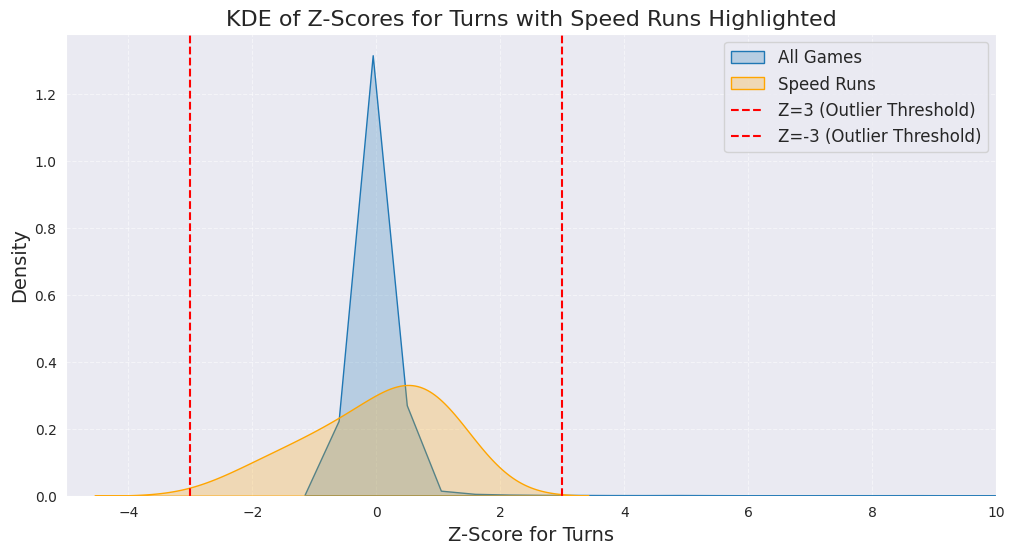

In [101]:
# plot speed runs with seaborn 
plt.figure(figsize=(12, 6))

sns.kdeplot(ascended_df['z_score_turns'], fill=True, label='All Games', bw_adjust=2)
sns.kdeplot(speed_runs['z_score_turns'], fill=True, label='Speed Runs', bw_adjust=2, color='orange')

plt.axvline(3, color='red', linestyle='--', linewidth=1.5, label='Z=3 (Outlier Threshold)')
plt.axvline(-3, color='red', linestyle='--', linewidth=1.5, label='Z=-3 (Outlier Threshold)')

plt.xlim(-5, 10) 
plt.xlabel("Z-Score for Turns", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("KDE of Z-Scores for Turns with Speed Runs Highlighted", fontsize=16)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# save plot 
plt.savefig('/code/NetHack-Research/reports/figures/kde-speed-run.png', dpi=300, bbox_inches='tight')

plt.show()

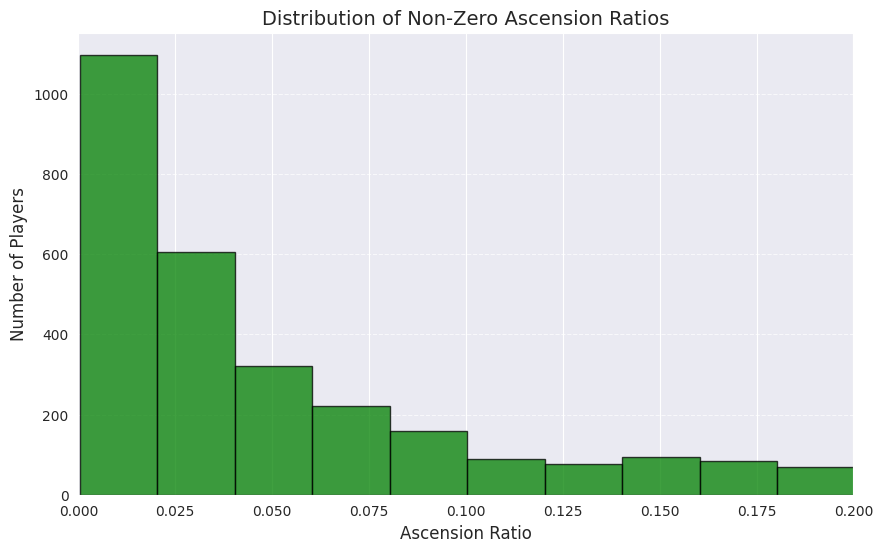

In [102]:
# Too Frequent: Players who are able to ascend with high frequency in their history of games  relative to the average player. 
# Define Ascension Frequency >= X (statistical top, e.g. top 1-5% of players) 

player_stats = full_df.groupby('name').agg(
    total_games = ('name', 'count'),
    total_ascensions = ('death', lambda x: x.str.contains('ascended', na=False).sum())
).reset_index()

# Ascension Ratio = total ascension / total games
player_stats['ascension_ratio'] = player_stats['total_ascensions'] / player_stats['total_games']

# Filter out players with zero ascension ratios
non_zero_ascension_ratios = player_stats[player_stats['ascension_ratio'] > 0]['ascension_ratio']

plt.figure(figsize=(10, 6))
plt.hist(non_zero_ascension_ratios, bins=50, alpha=0.75, color='green', edgecolor='black')
plt.title("Distribution of Non-Zero Ascension Ratios", fontsize=14)
plt.xlabel("Ascension Ratio", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 0.2) 
plt.show()

In [103]:
from sklearn.preprocessing import StandardScaler

stats = full_df.groupby('name').agg(
    total_games = ('name', 'count'),
    total_ascensions = ('death', lambda x: x.str.contains('ascended', na=False).sum()),
    average_turns = ('turns', 'mean'),
    average_points=('points', 'mean')
).reset_index()

stats['ascension_ratio'] = stats['total_ascensions'] / stats['total_games']

# Filter out players with 0 ascensions
stats = stats[stats['total_ascensions'] > 0]
# features for clustering 
features = ['total_games', 'total_ascensions', 'average_turns', 'average_points']
scaler = StandardScaler()
normalized_stats = scaler.fit_transform(stats[features])

stats[features]

,total_games,total_ascensions,average_turns,average_points
0,21,1,263.904762,8.683810e+02
2,544,2,4200.674632,2.920298e+04
6,521,4,3029.948177,3.523775e+04
7,45,4,8217.488889,2.705814e+05
12,20,2,7710.450000,3.307548e+05
...,...,...,...,...
48044,3118,8,3782.173188,2.331231e+04
48050,144,8,5231.208333,1.581587e+05
48055,2,1,56820.000000,3.163426e+06
48069,159,2,5871.962264,8.392364e+04


In [118]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


# Grid search over a range of values for eps and min_samples
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(5, 15)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(normalized_stats)
        
        # Only calculate silhouette score if there are at least 2 clusters
        if len(set(labels)) > 1:
            score = silhouette_score(normalized_stats, labels)
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_score': score})

# Convert results to DataFrame and sort by silhouette_score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='silhouette_score', ascending=False)
print(results_df.head(10))

    eps  min_samples  silhouette_score
85  0.9           10          0.874372
88  0.9           13          0.873669
86  0.9           11          0.873669
87  0.9           12          0.873669
74  0.8            9          0.872249
89  0.9           14          0.872056
75  0.8           10          0.871485
76  0.8           11          0.870179
77  0.8           12          0.868624
63  0.7            8          0.868327


In [115]:
# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=10)
stats['dbscan'] = dbscan.fit_predict(normalized_stats)

dbscan_summary = stats.groupby('dbscan').agg(
    avg_games=('total_games', 'mean'),
    avg_ascensions=('total_ascensions', 'mean'),
    avg_ascension_ratio=('ascension_ratio', 'mean')
)

print(dbscan_summary)

          avg_games  avg_ascensions  avg_ascension_ratio
dbscan                                                  
-1      1480.591549       94.239437             0.215222
 0       155.602041        4.617647             0.123159


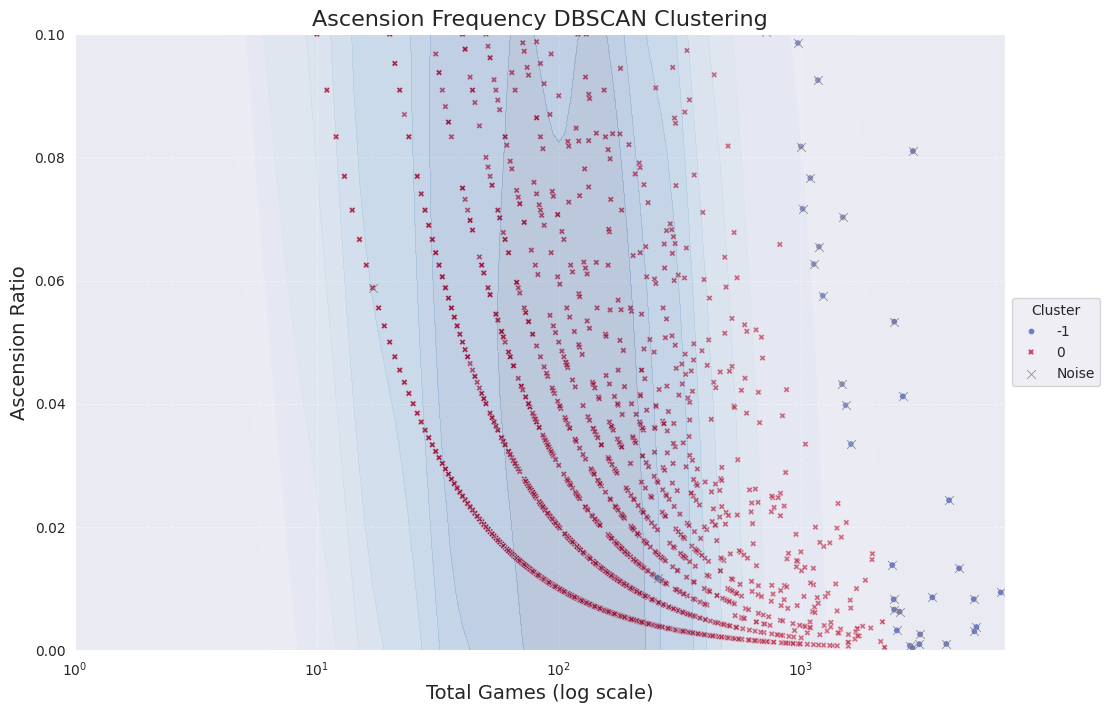

In [120]:
plt.figure(figsize=(12, 8))

stats['log_ascension_ratio'] = np.log1p(stats['ascension_ratio'])


# Scatter plot with DBSCAN clusters
sns.scatterplot(
    data=stats, 
    x='total_games', 
    y='ascension_ratio', 
    hue='dbscan', 
    palette='coolwarm', 
    style='dbscan', 
    s=20, 
    alpha=0.7
)

# Apply log scale to x-axis and constrain y-axis
plt.xscale('log')
plt.xlim(1, 7000)
plt.ylim(0, .1)

# Add density plot
sns.kdeplot(
    x=stats['total_games'], 
    y=stats['ascension_ratio'], 
    cmap='Blues', 
    fill=True, 
    alpha=0.2
)

# Highlight noise points
noise_points = stats[stats['dbscan'] == -1]
sns.scatterplot(
    data=noise_points, 
    x='total_games', 
    y='ascension_ratio', 
    color='gray', 
    marker='x', 
    s=40, 
    label='Noise'
)

# Enhance plot aesthetics
plt.xlabel('Total Games (log scale)', fontsize=14)
plt.ylabel('Ascension Ratio', fontsize=14)
plt.title('Ascension Frequency DBSCAN Clustering', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Cluster', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [122]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Prepare the data
stats = full_df.groupby('name').agg(
    total_games=('name', 'count'),
    maxlvl_mean=('maxlvl', 'mean'),
    average_turns=('turns', 'mean'),
    average_points=('points', 'mean')
).reset_index()

# Normalize the features
features = ['total_games', 'maxlvl_mean', 'average_turns', 'average_points']
scaler = StandardScaler()
normalized_stats = scaler.fit_transform(stats[features])

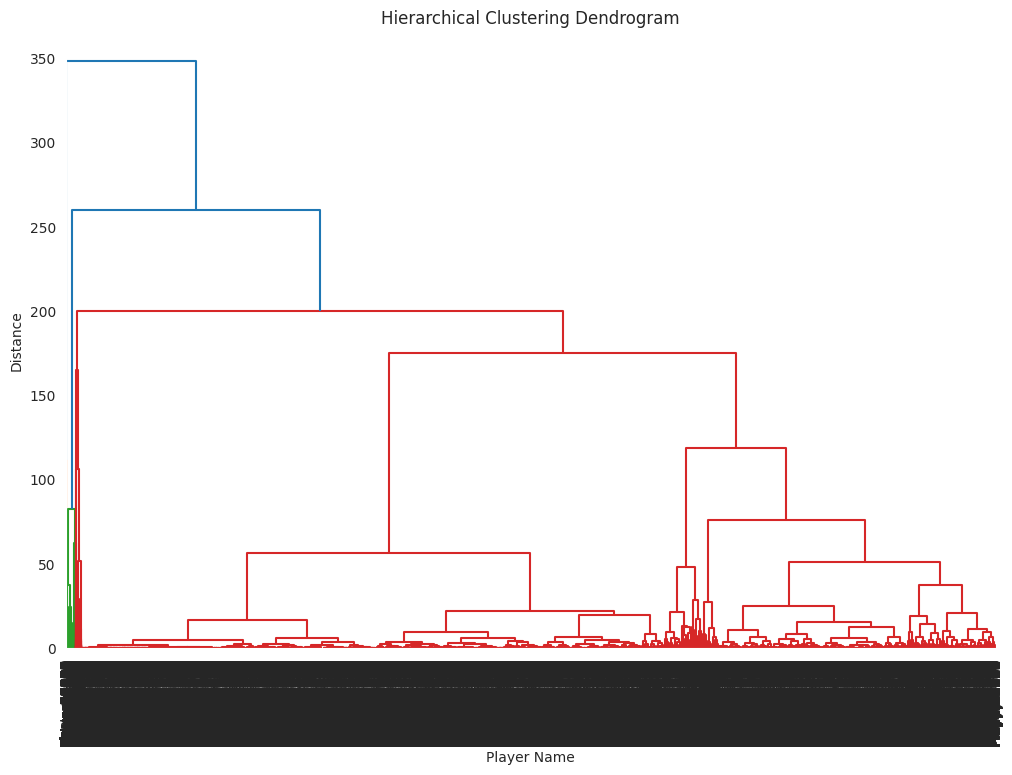

In [123]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix
linkage_matrix = linkage(normalized_stats, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=stats['name'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player Name')
plt.ylabel('Distance')
plt.show()

In [124]:
from scipy.cluster.hierarchy import fcluster

# Extract clusters with a chosen distance threshold
clusters = fcluster(linkage_matrix, t=5, criterion='distance')
stats['cluster'] = clusters

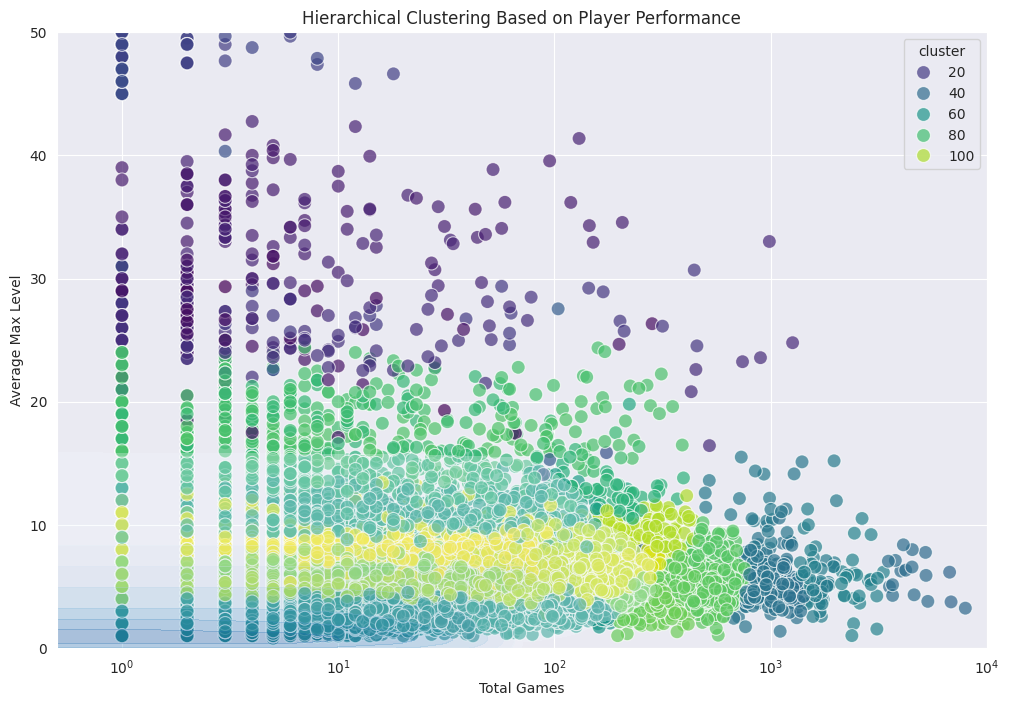

In [139]:

# Scatter plot to visualize clusters
# Scatter plot to visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=stats, 
    x='total_games', 
    y='maxlvl_mean', 
    hue='cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

# for i, row in stats.iterrows():
#     if row['maxlvl_mean'] > 30:  # Example threshold for experts
#         plt.annotate(
#             (row['total_games'], row['maxlvl_mean']),
#             fontsize=10, 
#             color='red'
#         )
        
sns.kdeplot(
    x=stats['total_games'], 
    y=stats['maxlvl_mean'], 
    cmap='Blues', 
    fill=True, 
    alpha=0.3
)
        
plt.xscale('log')
plt.xlim(.5, 10000)
plt.ylim(0, 50)
plt.xlabel('Total Games')
plt.ylabel('Average Max Level')
plt.title('Hierarchical Clustering Based on Player Performance')
plt.show()